In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from keras import backend as K
from keras import optimizers
from keras import losses
from keras.optimizers import SGD

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import initializers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [396]:
trainx = pd.read_csv('normTitanicTrainv2.csv')
trainx.head()

,principal component 1,principal component 2,principal component 3,PCA1K2,PCA2K2,Pclass,Age,SibSp,Parch,Fare,...,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,-2.080945,-0.887804,0.509364,-2.080946,-0.888417,0.841916,-0.584166,0.481288,-0.445,-0.503488,...,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,1.758017,-0.557055,-0.582937,-0.501432
1,3.468895,2.293439,-1.440919,3.469481,2.293412,-1.546098,0.639860,0.481288,-0.445,0.734601,...,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,-0.557055,-0.582937,1.994288
2,-0.115602,-1.959971,-2.099052,-0.115524,-1.958656,0.841916,-0.278160,-0.479087,-0.445,-0.490436,...,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432
3,2.868667,1.390982,-0.976561,2.869178,1.391102,-1.546098,0.410355,0.481288,-0.445,0.383026,...,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,-0.557055,-0.582937,1.994288
4,-2.401716,-0.167382,0.244433,-2.401634,-0.167243,0.841916,0.410355,-0.479087,-0.445,-0.488020,...,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432


In [397]:
trainx.shape

(892, 32)

In [398]:
model = Sequential() 
model.add(Dense(9, input_dim=32, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='relu',kernel_initializer=initializers.random_normal(stddev=0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax',kernel_initializer=initializers.random_normal(stddev=0.01)))

In [399]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 9)                 297       
_________________________________________________________________
dropout_29 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 60        
_________________________________________________________________
dropout_30 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 14        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [400]:
trainy = pd.read_csv('TitanicTrainY.csv')
trainy.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [401]:
testx = pd.read_csv('normTitanicTestv2.csv')
testx.head()

,principal component 1,principal component 2,principal component 3,PCA1K2,PCA2K2,Pclass,Age,SibSp,Parch,Fare,...,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1.129840,0.402480,-1.355072,1.130204,0.402187,0.841916,1.328375,0.481288,-0.445000,-0.508321,...,2.368778,-0.15052,-0.278148,-0.365148,-1.265854,2.033060,1.758017,-0.557055,-0.582937,-0.501432
1,-1.705687,2.040858,-0.404718,-1.705655,2.040562,-0.352091,2.475900,-0.479087,-0.445000,-0.456358,...,-0.422159,-0.15052,-0.278148,-0.365148,-1.265854,2.033060,-0.568823,1.795155,-0.582937,-0.501432
2,-2.397632,-0.422331,0.273303,-2.397556,-0.422194,0.841916,-0.201658,-0.479087,-0.445000,-0.476177,...,-0.422159,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432
3,1.264114,-1.679634,-1.071035,1.264329,-1.679487,0.841916,-0.584166,0.481288,0.710763,-0.406087,...,2.368778,-0.15052,-0.278148,-0.365148,0.789981,-0.491869,-0.568823,1.795155,-0.582937,-0.501432
4,-2.078728,-0.958319,0.739991,-2.078761,-0.958543,0.841916,-1.196179,-0.479087,-0.445000,-0.465301,...,-0.422159,-0.15052,-0.278148,2.738613,-1.265854,-0.491869,-0.568823,1.795155,-0.582937,-0.501432


In [402]:
testy = pd.read_csv('TitanicTestY.csv')
testy.head()

,Survived
0,1
1,0
2,0
3,1
4,0


In [403]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
#history = model.fit(trainSet, Ycombined, validation_split=0.01, epochs=1000, batch_size=128, verbose=0)

In [404]:
notY=1-testy

In [405]:
YcombinedTest = np.column_stack((testy, notY))

In [406]:
YcombinedTest.shape

(417, 2)

In [407]:
#YcombinedTest

In [408]:
YcombinedTest.shape

(417, 2)

In [409]:
notY=1-trainy

In [410]:
YcombinedTrain = np.column_stack((trainy, notY))

In [411]:
history = model.fit(trainx, YcombinedTrain, validation_data=(testx, YcombinedTest), epochs=1000, batch_size=128, verbose=0)

In [412]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

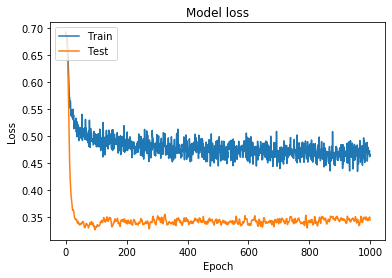

In [413]:
plot_loss(history)

In [414]:
score, acc = model.evaluate(testx, YcombinedTest,batch_size=128)

417/417 [==============================] - 0s 17us/step


In [415]:
score

0.34416576812593197

In [416]:
acc

0.8681055307388306

In [417]:
predict = model.predict(testx)

In [418]:
predict[:,1].shape

(417,)

In [419]:
predict[0,:]

array([0.49776492, 0.50223505], dtype=float32)

In [420]:
test = predict[:,0]
for i in range(len(test)):
    if predict[i,0] > 0.5: 
        predict[i,0] = 1
    else:
        predict[i,0] = 0

In [421]:
#test = predict[:,0]
#for i in test:
   #print(i)

In [422]:
cm=confusion_matrix(testy, predict[:,0])
print(cm)
precision_recall_fscore_support(testy, predict[:,0],  average='weighted')

[[239  26]
 [ 29 123]]


(0.8676286257380954, 0.86810551558753, 0.8678194193319247, None)